## Mandelbrot set

 Mandelbrot set is the set of values of c for which \
$ z_{n+1} = z_{n}^{2} + c $ &emsp; remains bounded

More specifically, a point $c$ belongs to the Mandelbrot set if and only if  \
$|z_{n}|\leq 2$ &emsp; for all &emsp; $n\geq 0$

More information can be found here:
- https://en.wikipedia.org/wiki/Mandelbrot_set

In [1]:
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline

### define parameters

In [2]:
# define size
# using top left and bottom right coordinates
img_size = ((0,0),(600,400))
frac_size = ((-2,-1),(1,1))
(frac_x0,frac_y0), (frac_x1,frac_y1) = frac_size
(img_x0,img_y0), (img_x1,img_y1) = img_size
img_w = img_x1 - img_x0
img_h = img_y1 - img_y0

# define parameters
maxIter = 100
frac_xStep = (frac_x1-frac_x0)/(img_x1-img_x0)
frac_yStep = (frac_y1-frac_y0)/(img_y1-img_y0)
params = {"maxIter":maxIter, "frac_xStep":frac_xStep, "frac_yStep":frac_yStep}    

### plot fractal

In [3]:
def fracToImg(frac_size,img_size,point):
  (frac_x0,frac_y0), (frac_x1,frac_y1) = frac_size
  (img_x0,img_y0), (img_x1,img_y1) = img_size
  img_x1 -= 1;  img_y1 -= 1

  x0, y0 = point
  x1 = round((x0-frac_x0)*(img_x1-img_x0)/(frac_x1-frac_x0) + img_x0)
  y1 = round((y0-frac_y0)*(img_y0-img_y1)/(frac_y1-frac_y0) + img_y1)
  return x1,y1

def plot_frac(frac_size,img_size,params):

  (frac_x0,frac_y0), (frac_x1,frac_y1) = frac_size
  (img_x0,img_y0), (img_x1,img_y1) = img_size
  img_w = img_x1 - img_x0
  img_h = img_y1 - img_y0

  img = Image.new('HSV', (img_w, img_h), (0,0,0))      
  for x in tqdm(np.arange(frac_x0, frac_x1+params["frac_xStep"], params["frac_xStep"])):    # have added step size to endpoints to include them
    for y in np.arange(frac_y0, frac_y1+params["frac_xStep"], params["frac_yStep"]):
      
      c = x+y*1j
      z = c

      for i in range(params["maxIter"]):
        z = z**2 + c
        if abs(z) > 2:
            break
      # color depends on the number of maxIter
      h = round(255*( i/(params["maxIter"]-1) ))
      s = 255
      v = round(255*( 1-i/(params["maxIter"]-1) ))  # points taking longer to converge should appear darker (more black)
      # Plot the point
      img.putpixel( fracToImg(frac_size,img_size,(x, y)), (h,s,v) )
  
  return img.convert('RGB')

In [4]:
img = plot_frac(frac_size,img_size,params)
#img   # uncomment to show the PIL image

add axes

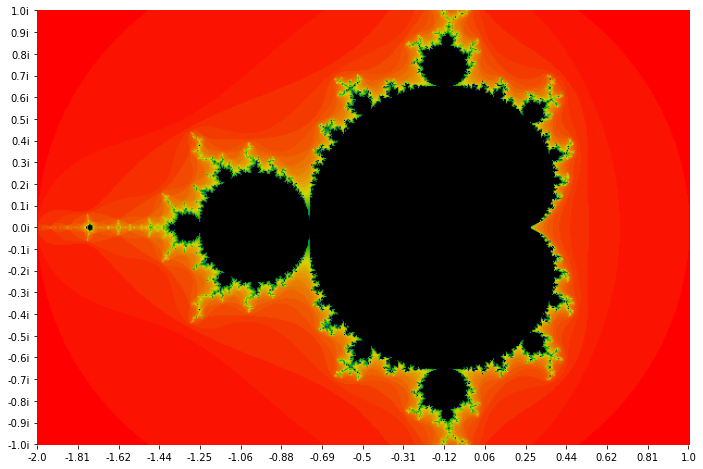

In [5]:
image = np.asarray(img) # converting it to ndarray

dpi = plt.rcParams['figure.dpi'] # get the default dpi value
dpi=50
fig_size = (img.size[0]/dpi, img.size[1]/dpi) # figure size

fig, ax = plt.subplots(1, figsize=fig_size)
ax.imshow(image)

xlen = 2*len(ax.get_xticks())
ylen = 2*len(ax.get_yticks())
xlen += (xlen+1)%2; ylen += (ylen+1)%2
xticks = np.linspace(img_x0,img_x1-1,xlen)
yticks = np.linspace(img_y0,img_y1-1,ylen)
xlabels = np.round(np.linspace(frac_x0,frac_x1,xlen),2)
ylabels = np.round(np.linspace(frac_y1,frac_y0,ylen),2)
ylabels = [str(l)+'i' for l in ylabels]

ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)

ax.set_frame_on(False)